# Smoke detection project

It is estimated that if every home had working smoke alarms, U.S. residential fire deaths could drop by 36%, with nearly 1100 lives saved per year. The number of false fire alarms is increasing continuously, which is a severe issue for firefighters.

## Data description

All credit regarding the data and relevant information about the problem goes to [Stefan Blattmann](https://github.com/Blatts01) through his [original project](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).

Data was colected through a series of sensors, across different controled scenarios:

* Normal indoor
* Normal outdoor
* Indoor wood fire, firefighter training area
* Indoor gas fire, firefighter training area
* Outdoor wood, coal, and gas grill
* Outdoor high humidity
* etc.

The following metrics correspond to one or more columns on the data set:

* UTC: Timestamp UTC seconds
* Air Temperature
* Air Humidity
* TVOC: Total Volatile Organic Compounds; measured in parts per billion [(Source)](https://en.wikipedia.org/wiki/Volatile_organic_compound)
* eCO2: CO2 equivalent concentration; calculated from different values like TVCO
* Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.) [(Source)](https://en.wikipedia.org/wiki/Hydrogen)
* Raw Ethanol: raw ethanol gas [(Source)](https://en.wikipedia.org/wiki/Ethanol)
* Air Pressure
* PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* CNT: Sample counter
* Fire Alarm: ground truth is "1" if a fire is there

Source: https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6

## Import data

In [24]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('smoke_detection_iot.csv', index_col=0)

# Check number of rows and columns and compare to dataset from terminal
print(df.shape)

(62630, 15)


In [25]:
# Check col names
print(df.columns)

# Rename columns
df.rename(columns = {'Temperature[C]': 'temperature_C',
                     'Humidity[%]': 'humidity', 
                     'TVOC[ppb]': 'TVOC_ppb',
                     'eCO2[ppm]': 'CO2_ppm', 
                     'Raw H2': 'raw_H2', 
                     'Raw Ethanol': 'raw_ethanol', 
                     'Pressure[hPa]': 'pressure_hPA', 
                     'Fire Alarm': 'fire'},
          inplace = True)

print(df.columns)

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')
Index(['UTC', 'temperature_C', 'humidity', 'TVOC_ppb', 'CO2_ppm', 'raw_H2',
       'raw_ethanol', 'pressure_hPA', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'fire'],
      dtype='object')


In [26]:
df.dtypes

UTC                int64
temperature_C    float64
humidity         float64
TVOC_ppb           int64
CO2_ppm            int64
raw_H2             int64
raw_ethanol        int64
pressure_hPA     float64
PM1.0            float64
PM2.5            float64
NC0.5            float64
NC1.0            float64
NC2.5            float64
CNT                int64
fire               int64
dtype: object

In [27]:
print(df.describe())

                UTC  temperature_C      humidity      TVOC_ppb       CO2_ppm  \
count  6.263000e+04   62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09      15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05      14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09     -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09      10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09      20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09      25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09      59.930000     75.200000  60000.000000  60000.000000   

             raw_H2   raw_ethanol  pressure_hPA         PM1.0         PM2.5  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912    938.627649    100.594309    184.467770   
std      272.464305    609.513156      1.3

In [28]:
df.head()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [29]:
df.tail()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [30]:
# Null x non-null
df.isnull().sum()
# There is no missing data

UTC              0
temperature_C    0
humidity         0
TVOC_ppb         0
CO2_ppm          0
raw_H2           0
raw_ethanol      0
pressure_hPA     0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
CNT              0
fire             0
dtype: int64

In [31]:
# Correlations between variables

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Pearson r correlation: the most widely used correlation statistic to measure the degree of the 
# relationship between linearly related variables.

# Spearman's rank corelation is a nonparametric measure of rank correlation (statistical dependence between the
# rankings of two variables). It assesses how well the relationship between two variables can be described using
# a monotonic function.

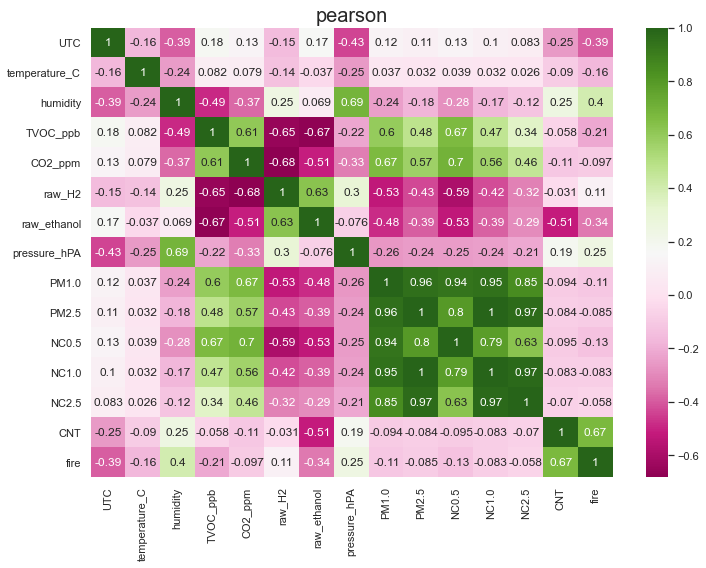

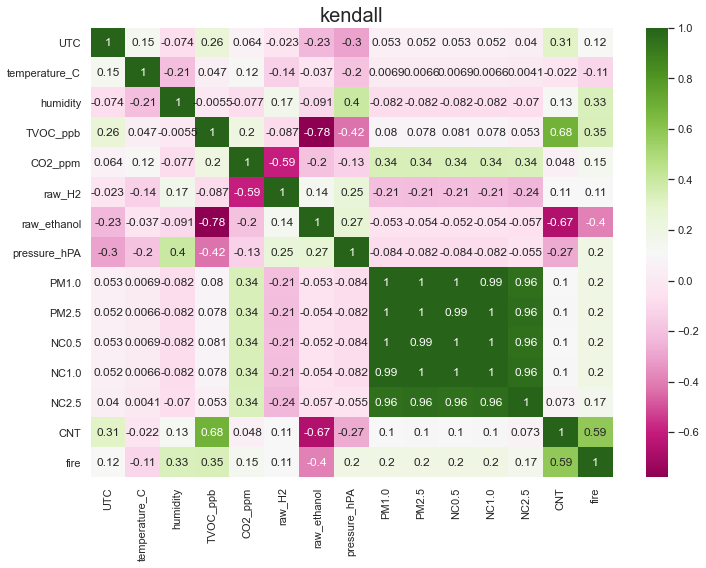

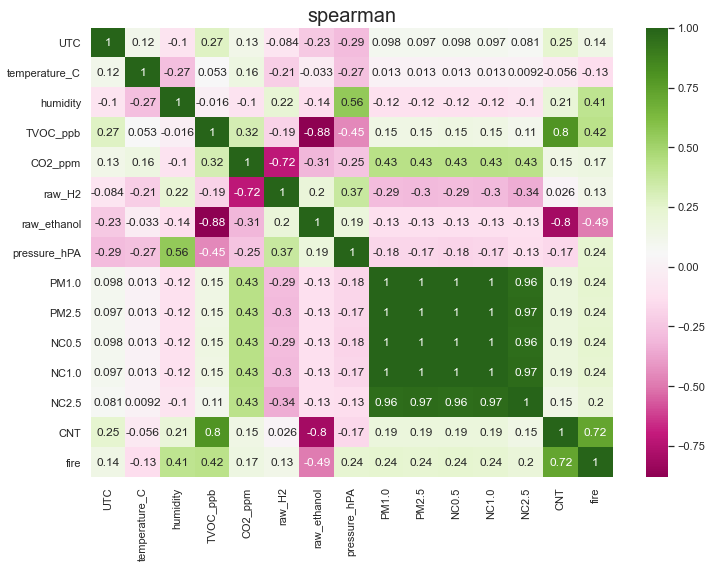

In [35]:
# Visualizations

# Correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in ['pearson', 'kendall', 'spearman']:
    plt.figure()
    sns.heatmap(df.corr(method = i), annot = True, cmap="PiYG").set_title(i, fontsize = 20)